In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
def clean_cols(df):
    df.columns = (df.columns.str.lower()
        .str.lower()
        .str.replace(",","_")
        .str.replace(" ","")
        .str.replace(":","")
        )
    return df

treatment = pd.read_csv('PerfTreatments.csv').pipe(clean_cols)
well_header = pd.read_csv('WellHeader_Datathon.csv').pipe(clean_cols)
production = pd.read_csv('WellProduction.csv').pipe(clean_cols)

In [4]:
well_header_test = well_header.copy()

In [5]:
test_data = well_header_test[well_header_test.tvd.isnull()]

In [6]:
test_data 



,epassetsid,province,licencenumber,uwi,currentoperator,currentstatus,currentstatusstandardised,welltype,welltypestandardised,formation,...,spuddate,finaldrilldate,rigreleasedate,daysdrilling,drillmetresperday,tvd,wellprofile,regulatoryagency,psacareacode,psacareaname
0,2587301,Alberta,475898,100122706624W500,Enerplus Corporation,Gas Lift,Active,Crude Oil,Oil,Montney,...,12/5/2015,12/18/2015,12/21/2015,13.0,282.85,NaN,Horizontal,AER,AB2,Foothills Front
8,2608978,Alberta,486729,102033006623W500,Arc Resources Ltd.,Flowing,Active,Crude Oil,Oil,Montney,...,1/13/2018,1/22/2018,1/23/2018,9.0,389.78,NaN,Horizontal,AER,AB2,Foothills Front
14,2608702,Alberta,486540,102120506520W500,Murphy Oil Company Ltd.,Flowing,Active,Gas,Gas,Duvernay,...,2/2/2018,3/26/2018,3/28/2018,52.0,117.50,NaN,Horizontal,AER,AB2,Foothills Front
15,2614267,Alberta,486539,100110506520W500,Murphy Oil Company Ltd.,Flowing,Active,Gas,Gas,Duvernay,...,2/3/2018,4/3/2018,4/5/2018,59.0,103.49,NaN,Directional,AER,AB2,Foothills Front
17,2608700,Alberta,486542,100040506520W500,Murphy Oil Company Ltd.,Flowing,Active,Gas,Gas,Duvernay,...,1/30/2018,3/7/2018,3/10/2018,36.0,158.36,NaN,Horizontal,AER,AB2,Foothills Front
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10422,2593752,Alberta,479566,102161403409W400,Tamarack Acquisition Corp.,Pumping,Active,Crude Oil,Oil,Viking,...,6/22/2016,6/24/2016,6/24/2016,2.0,1030.00,NaN,Horizontal,AER,AB3,Southeastern Alberta
10424,2588281,Alberta,475987,102061403409W400,Tamarack Acquisition Corp.,Pumping,Active,Crude Oil,Oil,Viking,...,7/11/2015,7/13/2015,7/13/2015,2.0,858.00,NaN,Horizontal,AER,AB3,Southeastern Alberta
10427,2588282,Alberta,475983,102081303409W400,Tamarack Acquisition Corp.,Pumping,Active,Crude Oil,Oil,Viking,...,7/9/2015,7/10/2015,7/11/2015,1.0,1737.00,NaN,Horizontal,AER,AB3,Southeastern Alberta
10428,2588283,Alberta,475986,104121203409W400,Tamarack Acquisition Corp.,Suspended,Suspended,Crude Oil,Oil,Viking,...,7/6/2015,7/8/2015,7/8/2015,2.0,879.50,NaN,Horizontal,AER,AB3,Southeastern Alberta


In [7]:
well_header1 =well_header.copy() 
train_data =well_header1.dropna(subset=['tvd'], inplace=True)

In [8]:
train_data = well_header1.copy()


In [9]:
train_data

,epassetsid,province,licencenumber,uwi,currentoperator,currentstatus,currentstatusstandardised,welltype,welltypestandardised,formation,...,spuddate,finaldrilldate,rigreleasedate,daysdrilling,drillmetresperday,tvd,wellprofile,regulatoryagency,psacareacode,psacareaname
1,2593278,Alberta,479407,102052706624W500,Enerplus Corporation,Gas Lift,Active,Crude Oil,Oil,Montney,...,5/26/2016,6/8/2016,6/10/2016,13.0,277.46,1954.58,Horizontal,AER,AB2,Foothills Front
2,2579437,Alberta,469132,100162206624W500,Enerplus Corporation,Gas Lift,Active,Crude Oil,Oil,Montney,...,1/6/2015,1/19/2015,1/22/2015,13.0,269.38,1940.06,Horizontal,AER,AB2,Foothills Front
3,2591761,Alberta,478708,100092206624W500,Enerplus Corporation,Gas Lift,Active,Crude Oil,Oil,Montney,...,1/12/2016,1/24/2016,1/26/2016,12.0,290.92,1945.01,Horizontal,AER,AB2,Foothills Front
4,2587302,Alberta,475923,100082206624W500,Enerplus Corporation,Gas Lift,Active,Crude Oil,Oil,Montney,...,12/28/2015,1/8/2016,1/11/2016,11.0,325.27,1956.34,Horizontal,AER,AB2,Foothills Front
5,2600942,Alberta,482788,102120606724W500,Arc Resources Ltd.,Flowing,Active,Crude Oil,Oil,Montney,...,3/20/2017,3/27/2017,3/29/2017,7.0,522.71,1911.62,Horizontal,AER,AB2,Foothills Front
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10431,2619591,Alberta,493555,100080903409W400,Tamarack Acquisition Corp.,Pumping,Active,Crude Oil,Oil,Viking,...,1/26/2019,2/13/2019,2/14/2019,18.0,114.89,888.62,Directional,AER,AB3,Southeastern Alberta
10432,2619592,Alberta,493554,102090303409W400,Tamarack Acquisition Corp.,Pumping,Active,Crude Oil,Oil,Viking,...,1/26/2019,2/11/2019,2/11/2019,16.0,129.75,889.74,Directional,AER,AB3,Southeastern Alberta
10434,2614697,Alberta,489828,100042802603W500,Nal Resources Limited,Pumping,Active,Crude Oil,Oil,Cardium,...,8/29/2018,9/8/2018,9/10/2018,10.0,553.10,2254.61,Directional,AER,AB2,Foothills Front
10435,2613170,Alberta,489493,100092202603W500,Nal Resources Limited,Pumping,Active,Crude Oil,Oil,Cardium,...,8/17/2018,8/24/2018,8/26/2018,7.0,682.71,2209.00,Directional,AER,AB2,Foothills Front


In [10]:
train_data = train_data[train_data.formation != 'Cardium']


In [10]:
print(test_data['formation'].value_counts())
print(test_data['province'].value_counts())
print(test_data['currentstatus'].value_counts())
print(test_data['wellprofile'].value_counts())
print(test_data['laheeclass'].value_counts())
print(test_data['regulatoryagency'].value_counts())
print(test_data['welltype'].value_counts())
print(train_data['formation'].value_counts())
print(train_data['province'].value_counts())
print(train_data['currentstatus'].value_counts())
print(train_data['wellprofile'].value_counts())
print(train_data['laheeclass'].value_counts())
print(train_data['regulatoryagency'].value_counts())
print(train_data['welltype'].value_counts())

Montney     2196
Viking      1306
Duvernay     204
Name: formation, dtype: int64
British Columbia    1740
Saskatchewan        1023
Alberta              943
Name: province, dtype: int64
Active       2739
Pumping       582
Flowing       308
Gas Lift       43
Suspended      34
Name: currentstatus, dtype: int64
Horizontal     3343
Directional     362
Vertical          1
Name: wellprofile, dtype: int64
Development                 3558
Outpost                       67
Deeper Pool Test              63
New Pool Wildcat              12
Development Service Well       4
Re-entry                       2
Name: laheeclass, dtype: int64
BCOGC    1740
SKER     1023
AER       943
Name: regulatoryagency, dtype: int64
Gas Production    1641
Oil Production    1122
Crude Oil          481
Gas                338
Shale Gas Only     124
Name: welltype, dtype: int64
Viking      3902
Montney     1199
Duvernay     483
Name: formation, dtype: int64
Saskatchewan    3088
Alberta         2496
Name: province, dtype: i

In [11]:
train_data_ML =train_data[['currentstatus','welltypestandardised','surf_longitude','surf_latitude','kbelevation', 'totaldepth','tvd','formation', 
  'wellprofile'     ]]


In [12]:
well_type = pd.get_dummies(train_data_ML['welltypestandardised'])
formation = pd.get_dummies(train_data_ML['formation'])
current_status= pd.get_dummies(train_data_ML['currentstatus'])
well_profile= pd.get_dummies(train_data_ML['wellprofile'])
train_data_ML.drop(['welltypestandardised','formation','wellprofile','currentstatus'],axis=1,inplace=True)
train_data_ML= pd.concat([train_data_ML,well_type,formation,current_status,well_profile],axis=1) 

C:\Users\ashis\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [13]:
train_data_ML1 = train_data_ML[(train_data_ML.tvd != 134 ) & (train_data.tvd != 3833.41)]#& (train_data.tvd != 698.11)& (train_data.tvd != 1550.79)]
train_data_ML1.info()
train_data_ML1.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5582 entries, 1 to 10432
Data columns (total 18 columns):
surf_longitude    5582 non-null float64
surf_latitude     5582 non-null float64
kbelevation       5582 non-null float64
totaldepth        5582 non-null float64
tvd               5582 non-null float64
Gas               5582 non-null uint8
Oil               5582 non-null uint8
Duvernay          5582 non-null uint8
Montney           5582 non-null uint8
Viking            5582 non-null uint8
Active            5582 non-null uint8
Flowing           5582 non-null uint8
Gas Lift          5582 non-null uint8
Pumping           5582 non-null uint8
Suspended         5582 non-null uint8
Directional       5582 non-null uint8
Horizontal        5582 non-null uint8
Vertical          5582 non-null uint8
dtypes: float64(5), uint8(13)
memory usage: 332.5 KB


Index(['surf_longitude', 'surf_latitude', 'kbelevation', 'totaldepth', 'tvd',
       'Gas', 'Oil', 'Duvernay', 'Montney', 'Viking', 'Active', 'Flowing',
       'Gas Lift', 'Pumping', 'Suspended', 'Directional', 'Horizontal',
       'Vertical'],
      dtype='object')

In [14]:
X1 = train_data_ML1[['surf_longitude', 'surf_latitude', 'kbelevation', 'totaldepth',
       'Gas', 'Oil', 'Duvernay', 'Montney', 'Viking']]
y1 = train_data_ML1[['tvd']]



In [15]:
import xgboost as xgb

In [16]:
#from sklearn.preprocessing import StandardScaler
#sc_X = StandardScaler()
#sc_y = StandardScaler()
#X2 = sc_X.fit_transform(X1)
#y2 = sc_y.fit_transform(y1)
#from sklearn.linear_model import RidgeCV, LinearRegression, Lasso
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.preprocessing import StandardScaler, PolynomialFeatures
#from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.34, random_state=31)
#lm = LinearRegression()
#lm.fit(X_train,y_train)

#LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
from sklearn.linear_model import RidgeCV, LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 10)]
#Number of features to consider at every split
#max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)
#Minimum number of samples required to split a node
#min_samples_split = [2, 5, 10]
#Minimum number of samples required at each leaf node
#min_samples_leaf = [1, 2, 4]
#Method of selecting samples for training each tree
#bootstrap = [True, False]
# Create the random grid
#random_grid = {'n_estimators': n_estimators,
             #'max_features': max_features,
            # 'max_depth': max_depth,
            #'min_samples_split': min_samples_split,
            #'min_samples_leaf': min_samples_leaf,
             # 'bootstrap': bootstrap}

#XGBModel = xgb.XGBRegressor()
#rf = RandomForestRegressor()
#rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
#rf_random.fit(X_train, y_train)
#rf_random.best_params_
#lr = RandomForestRegressor(n_estimators =266, min_samples_split=2, min_samples_leaf= 1, max_features='sqrt', max_depth=None, bootstrap=False)
#lr.fit(X_train, y_train)

#XGBModel = xgb.XGBRegressor(n_estimators = 5000,learning_rate =0.1,booster = 'gbtree',gamma =0.02,base_score=1,colsample_bytree=0.8,max_depth =5)
#XGBModel.fit(X_train,y_train , verbose=False)

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [24]:
model = Sequential()
model.add(Dense(10,activation='relu',input_dim = 9))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='Adam',loss='mse')

In [30]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=600)

Train on 3684 samples, validate on 1898 samples
Epoch 1/600
3684/3684 [==============================] - 0s 24us/sample - loss: 760.9597 - val_loss: 729.5642
Epoch 2/600
3684/3684 [==============================] - 0s 23us/sample - loss: 783.2911 - val_loss: 771.6455
Epoch 3/600
3684/3684 [==============================] - 0s 22us/sample - loss: 800.0492 - val_loss: 769.8217
Epoch 4/600
3684/3684 [==============================] - 0s 24us/sample - loss: 863.6644 - val_loss: 848.9093
Epoch 5/600
3684/3684 [==============================] - 0s 23us/sample - loss: 749.8761 - val_loss: 760.8531
Epoch 6/600
3684/3684 [==============================] - 0s 23us/sample - loss: 766.5796 - val_loss: 745.2215
Epoch 7/600
3684/3684 [==============================] - 0s 25us/sample - loss: 752.3908 - val_loss: 770.0227
Epoch 8/600
3684/3684 [==============================] - 0s 25us/sample - loss: 694.2506 - val_loss: 866.5841
Epoch 9/600
3684/3684 [==============================] - 0s 24us/sample 

3684/3684 [==============================] - 0s 26us/sample - loss: 702.1047 - val_loss: 717.4988
Epoch 75/600
3684/3684 [==============================] - 0s 24us/sample - loss: 691.3580 - val_loss: 935.4961
Epoch 76/600
3684/3684 [==============================] - 0s 26us/sample - loss: 703.7499 - val_loss: 794.0972
Epoch 77/600
3684/3684 [==============================] - 0s 24us/sample - loss: 678.2988 - val_loss: 768.2176
Epoch 78/600
3684/3684 [==============================] - 0s 28us/sample - loss: 658.0842 - val_loss: 686.9902
Epoch 79/600
3684/3684 [==============================] - 0s 24us/sample - loss: 648.5595 - val_loss: 666.9476
Epoch 80/600
3684/3684 [==============================] - 0s 24us/sample - loss: 802.5298 - val_loss: 715.1184
Epoch 81/600
3684/3684 [==============================] - 0s 23us/sample - loss: 724.8049 - val_loss: 686.6203
Epoch 82/600
3684/3684 [==============================] - 0s 23us/sample - loss: 650.9229 - val_loss: 691.0470
Epoch 83/600
3

3684/3684 [==============================] - 0s 25us/sample - loss: 667.7372 - val_loss: 654.5405
Epoch 148/600
3684/3684 [==============================] - 0s 28us/sample - loss: 638.9704 - val_loss: 723.0174
Epoch 149/600
3684/3684 [==============================] - 0s 28us/sample - loss: 646.3262 - val_loss: 728.6823
Epoch 150/600
3684/3684 [==============================] - 0s 31us/sample - loss: 634.2209 - val_loss: 669.4315
Epoch 151/600
3684/3684 [==============================] - 0s 26us/sample - loss: 653.3508 - val_loss: 660.6755
Epoch 152/600
3684/3684 [==============================] - 0s 24us/sample - loss: 639.1391 - val_loss: 702.4410
Epoch 153/600
3684/3684 [==============================] - 0s 24us/sample - loss: 669.8556 - val_loss: 636.9132
Epoch 154/600
3684/3684 [==============================] - 0s 25us/sample - loss: 647.5932 - val_loss: 660.2995
Epoch 155/600
3684/3684 [==============================] - 0s 31us/sample - loss: 640.6305 - val_loss: 726.3617
Epoch 

3684/3684 [==============================] - 0s 26us/sample - loss: 609.2832 - val_loss: 629.2333
Epoch 221/600
3684/3684 [==============================] - 0s 26us/sample - loss: 649.7194 - val_loss: 955.5931
Epoch 222/600
3684/3684 [==============================] - 0s 25us/sample - loss: 646.1067 - val_loss: 672.1607
Epoch 223/600
3684/3684 [==============================] - 0s 26us/sample - loss: 641.7925 - val_loss: 645.4596
Epoch 224/600
3684/3684 [==============================] - 0s 27us/sample - loss: 712.2887 - val_loss: 895.7389
Epoch 225/600
3684/3684 [==============================] - 0s 25us/sample - loss: 682.5299 - val_loss: 658.5776
Epoch 226/600
3684/3684 [==============================] - 0s 25us/sample - loss: 657.2091 - val_loss: 1111.9158
Epoch 227/600
3684/3684 [==============================] - 0s 25us/sample - loss: 650.5445 - val_loss: 649.4598
Epoch 228/600
3684/3684 [==============================] - 0s 27us/sample - loss: 585.4209 - val_loss: 734.7184
Epoch

3684/3684 [==============================] - 0s 28us/sample - loss: 727.6722 - val_loss: 838.6067
Epoch 294/600
3684/3684 [==============================] - 0s 28us/sample - loss: 663.0358 - val_loss: 592.6552
Epoch 295/600
3684/3684 [==============================] - 0s 28us/sample - loss: 583.6566 - val_loss: 624.2863
Epoch 296/600
3684/3684 [==============================] - 0s 29us/sample - loss: 613.0037 - val_loss: 742.9626
Epoch 297/600
3684/3684 [==============================] - 0s 29us/sample - loss: 619.1281 - val_loss: 585.0857
Epoch 298/600
3684/3684 [==============================] - 0s 30us/sample - loss: 582.7060 - val_loss: 620.1493
Epoch 299/600
3684/3684 [==============================] - 0s 30us/sample - loss: 668.2324 - val_loss: 610.6550
Epoch 300/600
3684/3684 [==============================] - 0s 30us/sample - loss: 615.2431 - val_loss: 614.5526
Epoch 301/600
3684/3684 [==============================] - 0s 32us/sample - loss: 605.0930 - val_loss: 651.2582
Epoch 

3684/3684 [==============================] - 0s 31us/sample - loss: 608.2348 - val_loss: 708.0496
Epoch 367/600
3684/3684 [==============================] - 0s 30us/sample - loss: 625.0529 - val_loss: 602.9966
Epoch 368/600
3684/3684 [==============================] - 0s 30us/sample - loss: 645.5237 - val_loss: 689.2386
Epoch 369/600
3684/3684 [==============================] - 0s 30us/sample - loss: 625.6763 - val_loss: 584.2466
Epoch 370/600
3684/3684 [==============================] - 0s 28us/sample - loss: 578.1150 - val_loss: 694.6004
Epoch 371/600
3684/3684 [==============================] - 0s 36us/sample - loss: 632.4246 - val_loss: 589.2950
Epoch 372/600
3684/3684 [==============================] - 0s 34us/sample - loss: 599.5432 - val_loss: 633.1859
Epoch 373/600
3684/3684 [==============================] - 0s 31us/sample - loss: 580.9936 - val_loss: 602.5705
Epoch 374/600
3684/3684 [==============================] - 0s 29us/sample - loss: 631.9894 - val_loss: 674.1663
Epoch 

3684/3684 [==============================] - 0s 28us/sample - loss: 646.7577 - val_loss: 825.3290
Epoch 440/600
3684/3684 [==============================] - 0s 27us/sample - loss: 631.1603 - val_loss: 632.6571
Epoch 441/600
3684/3684 [==============================] - 0s 26us/sample - loss: 574.0518 - val_loss: 640.0481
Epoch 442/600
3684/3684 [==============================] - 0s 26us/sample - loss: 592.5924 - val_loss: 570.4630
Epoch 443/600
3684/3684 [==============================] - 0s 27us/sample - loss: 574.9556 - val_loss: 598.1394
Epoch 444/600
3684/3684 [==============================] - 0s 30us/sample - loss: 580.1944 - val_loss: 601.7898
Epoch 445/600
3684/3684 [==============================] - 0s 25us/sample - loss: 575.8642 - val_loss: 657.0645
Epoch 446/600
3684/3684 [==============================] - 0s 26us/sample - loss: 585.6557 - val_loss: 623.0239
Epoch 447/600
3684/3684 [==============================] - 0s 27us/sample - loss: 586.6781 - val_loss: 628.2546
Epoch 

3684/3684 [==============================] - 0s 29us/sample - loss: 573.0961 - val_loss: 778.2910
Epoch 513/600
3684/3684 [==============================] - 0s 28us/sample - loss: 605.4861 - val_loss: 577.0047
Epoch 514/600
3684/3684 [==============================] - 0s 28us/sample - loss: 584.1846 - val_loss: 585.8483
Epoch 515/600
3684/3684 [==============================] - 0s 28us/sample - loss: 602.8217 - val_loss: 585.9839
Epoch 516/600
3684/3684 [==============================] - 0s 28us/sample - loss: 583.3926 - val_loss: 586.9353
Epoch 517/600
3684/3684 [==============================] - 0s 30us/sample - loss: 572.4507 - val_loss: 682.4803
Epoch 518/600
3684/3684 [==============================] - 0s 27us/sample - loss: 731.9709 - val_loss: 1146.4850
Epoch 519/600
3684/3684 [==============================] - 0s 27us/sample - loss: 658.8843 - val_loss: 641.2554
Epoch 520/600
3684/3684 [==============================] - 0s 27us/sample - loss: 587.1639 - val_loss: 614.8016
Epoch

3684/3684 [==============================] - 0s 28us/sample - loss: 606.9321 - val_loss: 585.5999
Epoch 586/600
3684/3684 [==============================] - 0s 28us/sample - loss: 565.8021 - val_loss: 614.9632
Epoch 587/600
3684/3684 [==============================] - 0s 27us/sample - loss: 580.9966 - val_loss: 709.2101
Epoch 588/600
3684/3684 [==============================] - 0s 30us/sample - loss: 641.7525 - val_loss: 595.3538
Epoch 589/600
3684/3684 [==============================] - 0s 27us/sample - loss: 581.0220 - val_loss: 571.8045
Epoch 590/600
3684/3684 [==============================] - 0s 27us/sample - loss: 545.2833 - val_loss: 591.6221
Epoch 591/600
3684/3684 [==============================] - 0s 27us/sample - loss: 600.9175 - val_loss: 580.1122
Epoch 592/600
3684/3684 [==============================] - 0s 27us/sample - loss: 585.6811 - val_loss: 666.2909
Epoch 593/600
3684/3684 [==============================] - 0s 28us/sample - loss: 592.8064 - val_loss: 582.6781
Epoch 

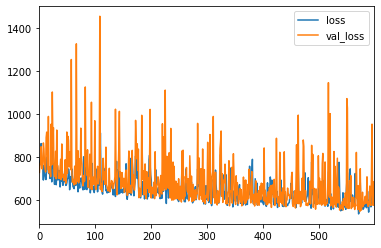

In [31]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [32]:
predictions = model.predict( X_test)

0.9993801158088127

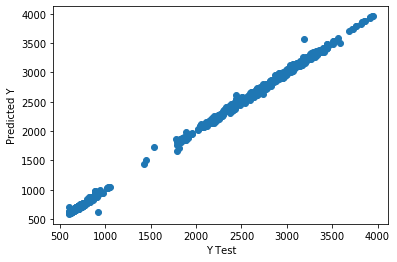

In [33]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
from sklearn.metrics import r2_score
coefficient_of_dermination = r2_score(y_test,predictions)
coefficient_of_dermination

In [34]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


MAE: 14.235619111297252
MSE: 583.2519784805806
RMSE: 24.15061031279708


In [36]:
test_data_ML1 =test_data[['welltypestandardised','surf_longitude','surf_latitude','kbelevation', 'totaldepth','tvd','formation' 
       ]]


test_data_ML1

,welltypestandardised,surf_longitude,surf_latitude,kbelevation,totaldepth,tvd,formation
0,Oil,-117.529866,54.747632,764.8,3677.0,NaN,Montney
8,Oil,-117.482119,54.745328,807.4,3508.0,NaN,Montney
14,Gas,-116.965662,54.578063,787.0,6110.0,NaN,Duvernay
15,Gas,-116.965540,54.578117,787.0,6106.0,NaN,Duvernay
17,Gas,-116.965908,54.577954,787.0,5701.0,NaN,Duvernay
...,...,...,...,...,...,...,...
10422,Oil,-111.161530,51.912631,783.0,2060.0,NaN,Viking
10424,Oil,-111.175877,51.910109,782.8,1716.0,NaN,Viking
10427,Oil,-111.137825,51.910015,784.4,1737.0,NaN,Viking
10428,Oil,-111.161386,51.912631,782.9,1759.0,NaN,Viking


In [38]:
well_type = pd.get_dummies(test_data_ML1['welltypestandardised'])
formation = pd.get_dummies(test_data_ML1['formation'])

test_data_ML1.drop(['welltypestandardised','formation'],axis=1,inplace=True)
test_data_ML1= pd.concat([test_data_ML1,well_type,formation],axis=1) 
test_data_ML1


C:\Users\ashis\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,surf_longitude,surf_latitude,kbelevation,totaldepth,tvd,Gas,Oil,Duvernay,Montney,Viking
0,-117.529866,54.747632,764.8,3677.0,NaN,0,1,0,1,0
8,-117.482119,54.745328,807.4,3508.0,NaN,0,1,0,1,0
14,-116.965662,54.578063,787.0,6110.0,NaN,1,0,1,0,0
15,-116.965540,54.578117,787.0,6106.0,NaN,1,0,1,0,0
17,-116.965908,54.577954,787.0,5701.0,NaN,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
10422,-111.161530,51.912631,783.0,2060.0,NaN,0,1,0,0,1
10424,-111.175877,51.910109,782.8,1716.0,NaN,0,1,0,0,1
10427,-111.137825,51.910015,784.4,1737.0,NaN,0,1,0,0,1
10428,-111.161386,51.912631,782.9,1759.0,NaN,0,1,0,0,1


In [40]:
X1 = test_data_ML1[['surf_longitude', 'surf_latitude', 'kbelevation', 'totaldepth',
       'Gas', 'Oil', 'Duvernay', 'Montney', 'Viking']]
X1_test  = scaler.transform(X1)

In [41]:
test_data['TVD'] = model.predict(X1_test)

C:\Users\ashis\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
submission = pd.read_csv('Submission_Sample.csv').pipe(clean_cols)
submission

,epassetsid,tvd
0,1161143,1740.949196
1,2597084,244.915290
2,1164793,1046.683946
3,1170291,794.188425
4,2603236,1568.888132
...,...,...
1958,1159695,1079.563934
1959,2612450,972.673541
1960,2607916,122.981610
1961,2602544,1921.057294


In [43]:
prediction = pd.merge(submission,test_data,on='epassetsid')
prediction

,epassetsid,tvd_x,province,licencenumber,uwi,currentoperator,currentstatus,currentstatusstandardised,welltype,welltypestandardised,...,finaldrilldate,rigreleasedate,daysdrilling,drillmetresperday,tvd_y,wellprofile,regulatoryagency,psacareacode,psacareaname,TVD
0,1161143,1740.949196,Saskatchewan,57390,103010803325W300,Ish Energy Ltd.,Active,Active,Oil Production,Oil,...,6/30/2016,6/30/2016,3.0,490.233333,NaN,Horizontal,SKER,SK2,Southwestern Saskatchewan,736.009583
1,2597084,244.915290,Alberta,480916,102140806605W600,Nuvista Energy Ltd.,Pumping,Active,Gas,Gas,...,3/29/2017,4/1/2017,102.0,44.790000,NaN,Horizontal,AER,AB2,Foothills Front,2912.039795
2,1164793,1046.683946,Saskatchewan,69721,103071103120W300,Teine Energy Ltd.,Active,Active,Oil Production,Oil,...,6/4/2017,6/4/2017,1.0,1487.000000,NaN,Horizontal,SKER,SK2,Southwestern Saskatchewan,706.323853
3,1170291,794.188425,Saskatchewan,99784,101033202414W300,Baytex Energy Ltd.,Active,Active,Oil Production,Oil,...,8/17/2018,8/18/2018,1.0,1925.000000,NaN,Horizontal,SKER,SK2,Southwestern Saskatchewan,686.162537
4,2603236,1568.888132,Alberta,483716,102031706524W500,Arc Resources Ltd.,Flowing,Active,Crude Oil,Oil,...,8/9/2017,8/9/2017,9.0,485.330000,NaN,Horizontal,AER,AB2,Foothills Front,2253.921387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1958,1159695,1079.563934,Saskatchewan,51780,104032802922W300,Crescent Point Resources Partnership,Active,Active,Oil Production,Oil,...,1/7/2016,1/8/2016,1.0,1429.000000,NaN,Horizontal,SKER,SK2,Southwestern Saskatchewan,731.598938
1959,2612450,972.673541,Alberta,478458,100092506321W502,Paramount Resources Ltd.,Flowing,Active,Shale Gas Only,Gas,...,4/1/2018,4/6/2018,120.0,50.520000,NaN,Directional,AER,AB2,Foothills Front,3084.178467
1960,2607916,122.981610,Alberta,482076,100081307813W602,Birchcliff Energy Ltd.,Flowing,Active,Gas,Gas,...,8/7/2017,8/10/2017,30.0,169.200000,NaN,Horizontal,AER,AB7,Northwestern Alberta,2262.447510
1961,2602544,1921.057294,Alberta,483362,102051103508W400,Karve Energy Inc.,Pumping,Active,Crude Oil,Oil,...,8/29/2017,8/30/2017,2.0,829.000000,NaN,Horizontal,AER,AB4,East Central Alberta,851.805481


In [44]:
submission_predicted_tvd = prediction[['epassetsid','TVD']]
submission_predicted_tvd

,epassetsid,TVD
0,1161143,736.009583
1,2597084,2912.039795
2,1164793,706.323853
3,1170291,686.162537
4,2603236,2253.921387
...,...,...
1958,1159695,731.598938
1959,2612450,3084.178467
1960,2607916,2262.447510
1961,2602544,851.805481


In [45]:
submission_predicted_tvd.to_csv('submission21.csv',index = False)